In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data=datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data=datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 70480567.10it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31052472.14it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 33201590.96it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5441453.52it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [7]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [8]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [9]:
train_data.targets.size()

torch.Size([60000])

In [10]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [18]:
from torch.utils.data import DataLoader

loaders={

         'train' : DataLoader( train_data , batch_size=100 , shuffle=True , num_workers=1),
          'test' : DataLoader( test_data , batch_size=100 , shuffle=True , num_workers=1)

}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7eb37f8fad40>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7eb37f8fa290>}

In [54]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)


In [55]:
import torch
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [56]:
device


device(type='cpu')

In [68]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average Loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)\n')


In [70]:
for epoch in range (1,11):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	0.695202
Train Epoch: 1 [2000/60000 (3%)]	0.320941
Train Epoch: 1 [4000/60000 (7%)]	0.404546
Train Epoch: 1 [6000/60000 (10%)]	0.297219
Train Epoch: 1 [8000/60000 (13%)]	0.431414
Train Epoch: 1 [10000/60000 (17%)]	0.408758
Train Epoch: 1 [12000/60000 (20%)]	0.636909
Train Epoch: 1 [14000/60000 (23%)]	0.399370
Train Epoch: 1 [16000/60000 (27%)]	0.402276
Train Epoch: 1 [18000/60000 (30%)]	0.257745
Train Epoch: 1 [20000/60000 (33%)]	0.342560
Train Epoch: 1 [22000/60000 (37%)]	0.388480
Train Epoch: 1 [24000/60000 (40%)]	0.537657
Train Epoch: 1 [26000/60000 (43%)]	0.345845
Train Epoch: 1 [28000/60000 (47%)]	0.368557
Train Epoch: 1 [30000/60000 (50%)]	0.307662
Train Epoch: 1 [32000/60000 (53%)]	0.330272
Train Epoch: 1 [34000/60000 (57%)]	0.497003
Train Epoch: 1 [36000/60000 (60%)]	0.410729
Train Epoch: 1 [38000/60000 (63%)]	0.377184
Train Epoch: 1 [40000/60000 (67%)]	0.238338
Train Epoch: 1 [42000/60000 (70%)]	0.560731
Train Epoch: 1 [44000/60000 (73%)]	0.480662

prediction: 7


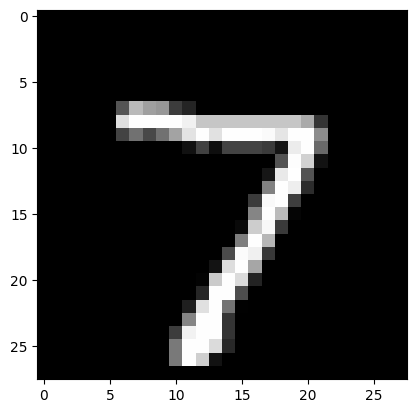

In [78]:
import matplotlib.pyplot as plt

model.eval()
data,target=test_data[0]
data = data.unsqueeze(0).to(device)
output=model(data)
prediction=output.argmax(dim=1,keepdim=True).item()
print(f'prediction: {prediction}')
image =data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image ,cmap='gray')
plt.show()